In [1]:
import numpy as np
import pickle
import cPickle
from MSMRD.analysis import estimateConfidenceInterval, estimateMeanDistribution
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyemma
%matplotlib inline
from scipy import stats as stats
plt.style.use('paperPlot')

In [2]:
pathBenchmark = '/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/'
pathHybrid = '/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/hybrid/'

In [3]:
SF = 2
lagtime = 0.05
files = ['1', '2', '4', '8', '10', '20', '40', '80', '120']
Nfiles = [1, 2, 4, 8, 10, 20, 40, 80, 120]

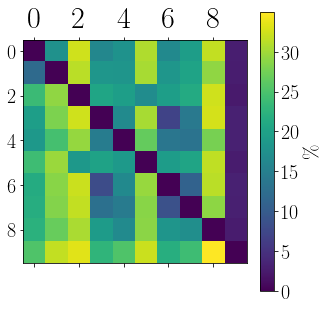

In [4]:
MFPT_benchmark = pickle.load(open(pathBenchmark+'mfpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
MFPT_hybrid = pickle.load(open(pathHybrid+'mfpts_10000_runs_lag'+str(lagtime)+'_R2.5_'+files[-1]+'files_240partitions.p','r'))
#plt.matshow((MFPT_hybrid-MFPT_benchmark)/MFPT_benchmark)
plt.matshow(MFPT_benchmark)
#plt.clim(-.1,0.1)
plt.colorbar(label='\%')
#plt.savefig('../Report/figs/periodicModel/MFPTs_benchmark.pdf')

/home/mi/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


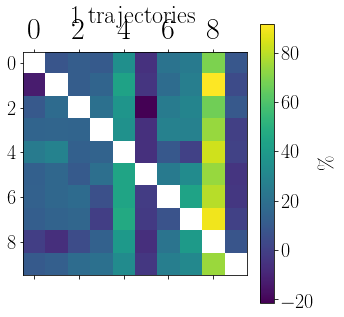

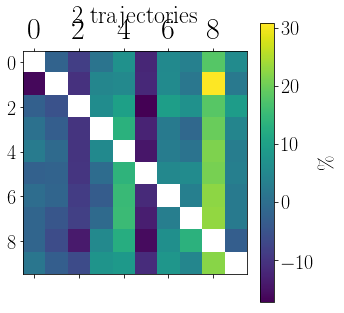

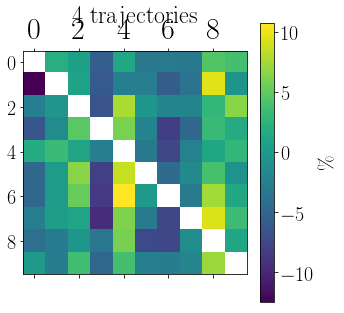

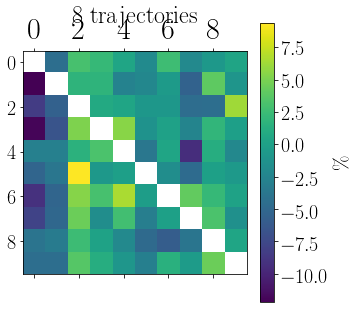

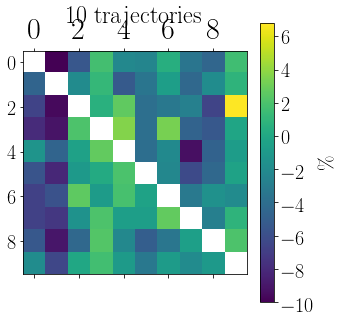

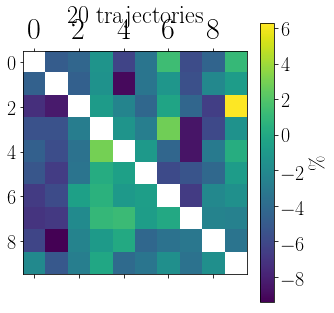

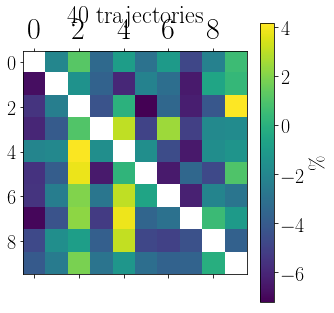

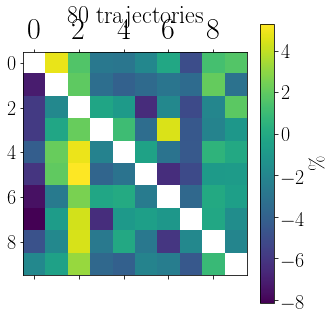

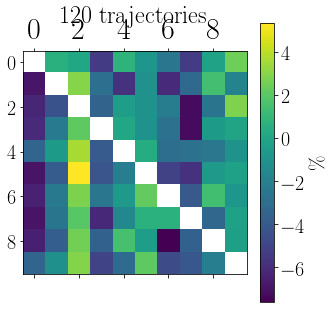

In [5]:
MFPT_benchmark = pickle.load(open(pathBenchmark+'mfpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
for i in range(len(files)):
    MFPT_hybrid = pickle.load(open(pathHybrid+'mfpts_10000_runs_lag'+str(lagtime)+'_R2.5_'+files[i]+'files_240partitions.p','r'))
    plt.matshow((MFPT_hybrid-MFPT_benchmark)/MFPT_benchmark*100)
    plt.colorbar(label='\%')
    plt.title(str(files[i])+' trajectories', y = 1.1)
    #plt.savefig('../Report/figs/periodicModel/relativeError_mfpts_lag50_'+files[i]+'files.pdf')

/home/mi/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


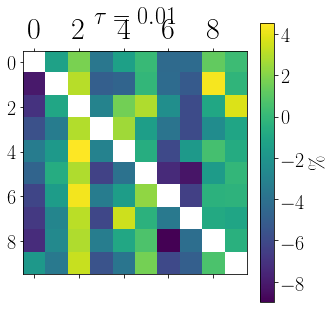

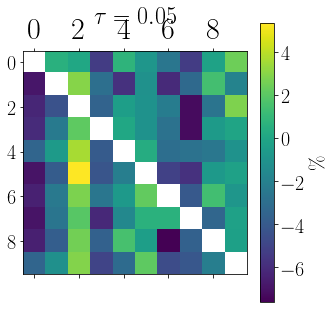

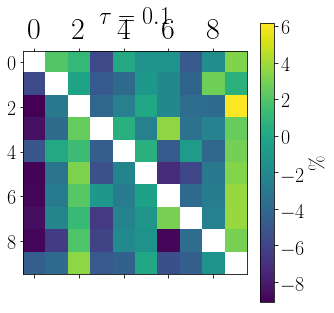

In [6]:
lagtimes = [0.01, 0.05, 0.1]#, 0.2]
MFPT_benchmark = pickle.load(open(pathBenchmark+'mfpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
for i in range(len(lagtimes)):
    MFPT_hybrid = pickle.load(open(pathHybrid+'mfpts_10000_runs_lag'+str(lagtimes[i])+'_R2.5_'+files[-1]+'files_240partitions.p','r'))
    plt.matshow((MFPT_hybrid-MFPT_benchmark)/MFPT_benchmark*100)
    plt.colorbar(label='\%')
    plt.title('$\\tau='+str(lagtimes[i])+'$', y=1.1)
    #plt.savefig('../Paper/figs/asym3D/3DrelativeError_mfpts_lag'+str(lagtimes[i])+'_120files.pdf', bbox_inches='tight')

In [7]:
FPT_benchmark = pickle.load(open(pathBenchmark+'fpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0_all.p','r'))
oneNorm = np.zeros([10, 10, len(files)])
twoNorm = np.zeros([10, 10, len(files)])
for i in range(len(files)):
    FPT_hybrid = pickle.load(open(pathHybrid+'fpts_10000_runs_lag'+str(lagtime)+'_R2.5_'+files[i]+'files_240partitions.p','r'))
    for j in range(10):
        for k in range(10):
            if j!=k:
                hist1 = np.histogram(FPT_benchmark[j][k], bins = 100, normed=True)
                hist2 = np.histogram(FPT_hybrid[j][k], bins = hist1[1],normed=True)
                oneNorm[j,k,i] = np.mean(np.abs(hist1[0] - hist2[0]))*(hist1[1][1]-hist1[1][0])*len(hist1[1])
                twoNorm[j,k,i] = np.linalg.norm(np.abs(hist1[0] - hist2[0])*(hist1[1][1]-hist1[1][0]))

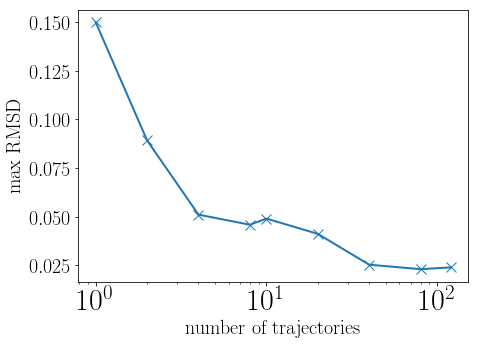

In [8]:
maxNorm = []
for i in range(len(Nfiles)):
    maxNorm.append(np.amax(twoNorm[:,:,i]))
plt.semilogx(Nfiles, maxNorm, '-x')
plt.ylabel('max RMSD')
plt.xlabel('number of trajectories')
#plt.savefig('../Paper/figs/asym3D/maxRMSDerror.pdf', bbox_inches='tight')

In [ ]:
FPT_benchmark = pickle.load(open(pathBenchmark+'fpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
FPT_hybrid = pickle.load(open(pathHybrid+'fpts_10000runs_hybrid_box_lag'+str(lagtime)+'_SF'+str(SF)+'_exitCompensation_' + files[-1] +'files.p','r'))
hist1 = plt.hist(FPT_benchmark[4][9], bins = 200, alpha=0.5, normed=True, label='benchmark')
hist2 = plt.hist(FPT_hybrid[4][9], bins = hist1[1], alpha=0.5, normed=True, label='$\\tau = 0.05$')
plt.legend()
plt.xlim(0,45)
#plt.savefig('../Report/figs/periodicModel/2Dh
ist4toBath.pdf')
print np.linalg.norm(np.abs(hist1[0] - hist2[,0]))
print np.mean(np.abs(hist1[0] - hist2[0]))*100

# Validate internal dynamics

In [4]:
mfpts_internalB = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/internal/mfpts_10000_runs_2.5R_3D_internalDynamics_benchmark_dt0.001_SF2.p', 'r'))
mfpts_internalBrerun = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/internal/mfpts_10000_runs_fullRerun_2.5R_3D_internalDynamics_benchmark_dt0.001_SF2.p', 'r'))
mfpts_internalH = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/internal/mfpts_10000_runs_2.5R_3D_internalDynamics_hybrid_lag0.05_240partitions.p', 'r'))

/home/mi/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


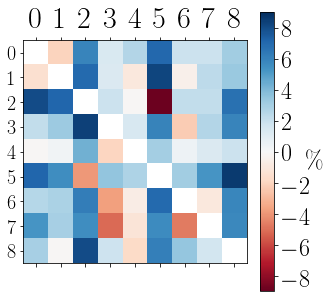

In [11]:
ax = plt.matshow((mfpts_internalBrerun-mfpts_internalH)/mfpts_internalBrerun*100, cmap='RdBu', vmin=-9, vmax=9)
mpl.rcParams.update({'ytick.labelsize':24, 'xtick.labelsize':24, 'axes.labelsize':24, 'axes.titlesize':24})
cbar = plt.colorbar()
cbar.set_label('\%', rotation=0)
#plt.xlabel('j')
#plt.ylabel('i')
#plt.title('Internal dynamics', y=1.1)
#plt.savefig('../Paper/figs/asym3D/internalDynamicsWhiteCenter_notitle.pdf') #, bbox_inches='tight') dont't use 'tight cause it shifts the colorbar up

In [216]:
print mfpts_internalBrerun[2,5]
print mfpts_internalB[2,5]

0.6237788
0.6054354


In [217]:
mfpts_internal_avg = (mfpts_internalB+mfpts_internalBrerun)/2.

/home/mi/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


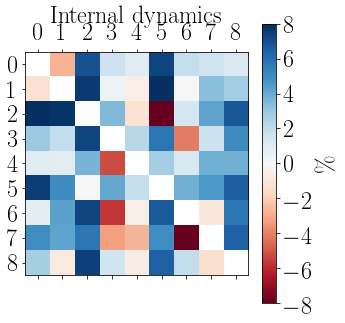

In [12]:
plt.matshow((mfpts_internalB-mfpts_internalH)/mfpts_internalB*100, cmap='RdBu', vmin=-8, vmax=8)
plt.colorbar(label='\%')
plt.title('Internal dynamics', y=1.1)
#plt.savefig('../Paper/figs/asym3D/internalDynamicsWhiteCenter.pdf', bbox_inches='tight')

[23 66 69 47 57 33  1 39 76  9 67 61 13 58 15 22 36 73 37 42 43 12  3 31 79
 75 21  7  6 44 24 27 25 16 54  4 34 49 55 64 72 41  8 51 28 17 78 48 38 63
 52 46 65 68 71 62 35  2 32 77 56 26 59 11  5 19 45 74 18 14 29 53  0 40 60
 50 30 20 10 70 80]


/home/mi/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

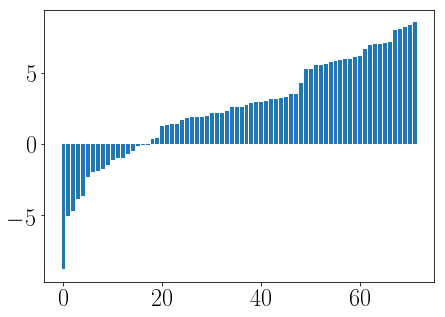

In [13]:
error = np.ndarray.flatten((mfpts_internalBrerun-mfpts_internalH)/mfpts_internalBrerun*100)
values = np.ndarray.flatten(mfpts_internalBrerun)
args = np.argsort(error)
xs = np.arange(len(error))
plt.bar(xs, error[args])
#plt.bar(xs, 3*values[args], alpha=0.5)
print args
np.arange(81).reshape((9,9))

In [6]:
fpts_internalBrerun = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/internal/fpts_10000_runs_fullRerun_2.5R_3D_internalDynamics_benchmark_dt0.001_SF2.p', 'r'))
fpts_internalB = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/internal/fpts_10000_runs_2.5R_3D_internalDynamics_benchmark_dt0.001_SF2.p', 'r'))
fpts_internalH = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/internal/fpts_10000_runs_2.5R_3D_internalDynamics_hybrid_lag0.05_240partitions.p', 'r'))

In [7]:
fpts_internalH_rerun = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/internal/results_10000_runs_rerun_2.5R_3D_internalDynamics_hybrid_lag0.05_240partitions.p', 'r'))
fpts_internalB_rerun = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/internal/results_10000_runs_rerun_2.5R_3D_internalDynamics_benchmark_dt0.001_SF2.p', 'r'))

In [16]:
print np.mean(fpts_internalH_rerun[0][0])
print np.mean(fpts_internalH[2][5])
print np.mean(fpts_internalB[2][5])
print np.mean(fpts_internalB[2][5][0][np.where(fpts_internalB[2][5][0] > 0.05)[0]])
print np.mean(fpts_internalB_rerun[0][0])
(0.6382062 - 0.678865)/0.6382062

0.6712
0.678865
0.6054354
0.612131235455
0.6382062


-0.06370793640049267

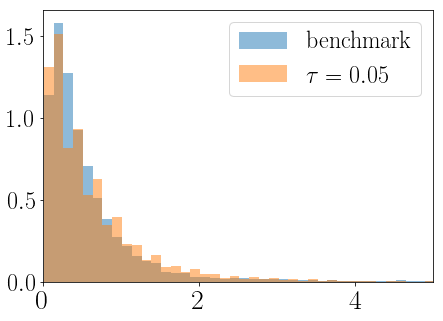

In [20]:
hist1 = plt.hist(fpts_internalBrerun[2][5], bins = 100, alpha=0.5, normed=True, label='benchmark')
hist2 = plt.hist(fpts_internalH[2][5], bins = hist1[1], alpha=0.5, normed=True, label='$\\tau = 0.05$')
plt.xlim(0, 5)
plt.legend()
#plt.savefig('../Paper/figs/asym3D/2to5internal.pdf', bbox_inches='tight')

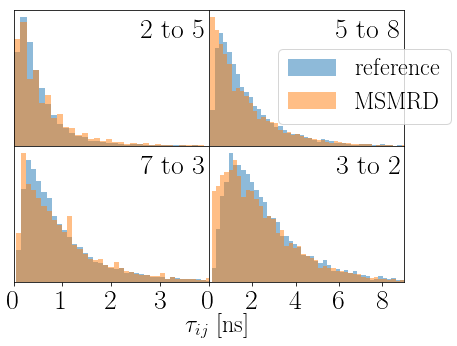

In [21]:
# Three subplots sharing both x/y axes
mpl.rcParams.update({'ytick.labelsize':24, 'xtick.labelsize':28, 'axes.labelsize':24, 'axes.titlesize':26})
f, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False)
hist11 = ax1.hist(fpts_internalBrerun[2][5], bins = 100, alpha=0.5, normed=True, label='benchmark')
hist12 = ax1.hist(fpts_internalH[2][5], bins = hist11[1], alpha=0.5, normed=True, label='hybrid')
ax1.set_xlim([0,4])
ax1.text(0.65*ax1.get_xlim()[1], 0.8*ax1.get_ylim()[1], '2 to 5', fontsize=28)
hist21 = ax2.hist(fpts_internalBrerun[7][3], bins = 100, alpha=0.5, normed=True, label='benchmark')
hist22 = ax2.hist(fpts_internalH[7][3], bins = hist21[1], alpha=0.5, normed=True, label='$\\tau = 0.05$')
ax2.set_xlim([0,4])
ax2.set_xticks([0, 1, 2, 3])
ax2.text(0.65*ax2.get_xlim()[1], 0.8*ax2.get_ylim()[1], '7 to 3', fontsize=28)
hist31 = ax3.hist(fpts_internalBrerun[5][8], bins = 80, alpha=0.5, normed=True, label='benchmark')
hist32 = ax3.hist(fpts_internalH[5][8], bins = hist31[1], alpha=0.5, normed=True, label='$\\tau = 0.05$')
ax3.set_xlim([0,9])
ax3.text(0.65*ax3.get_xlim()[1], 0.8*ax3.get_ylim()[1], '5 to 8', fontsize=28)
hist41 = ax4.hist(fpts_internalBrerun[3][2], bins = 100, alpha=0.5, normed=True, label='reference')
hist42 = ax4.hist(fpts_internalH[3][2], bins = hist41[1], alpha=0.5, normed=True, label='MSMRD')
ax4.set_xlim([0,9])
ax4.set_xticks([0., 2, 4, 6, 8])
ax4.text(0.65*ax4.get_xlim()[1], 0.8*ax4.get_ylim()[1], '3 to 2', fontsize=28)
#ax1.set_title('Sharing both axes')
#ax2.scatter(x, y)
#ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0, wspace=0)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.3, 1.8))
plt.text(-1.1, -0.14, '$\\tau_{ij}$ [ns]', fontsize=24)
plt.savefig('../../Paper/figs/asym3D/internalDynamicsHistograms_units.pdf', bbox_inches='tight')
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)